In [13]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pydicom
%matplotlib inline

In [14]:
ROOT_DIR = os.getcwd()
DICOM_DIR = "AllDICOMs"

In [15]:
#DICOM id's 
dicom_dict = {}
dicom_names = os.listdir(os.path.join(ROOT_DIR, DICOM_DIR))
dicom_names.remove("inbreastBuilder.m")
dicom_names.remove("read_mixed_csv.m")
for dicom_name in dicom_names:
    dicom_dict[dicom_name.split("_")[0]] = dicom_name

In [16]:
print(len(dicom_dict))
dicom_dict

410


{'20586908': '20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm',
 '20586934': '20586934_6c613a14b80a8591_MG_L_CC_ANON.dcm',
 '20586960': '20586960_6c613a14b80a8591_MG_R_ML_ANON.dcm',
 '20586986': '20586986_6c613a14b80a8591_MG_L_ML_ANON.dcm',
 '20587054': '20587054_b6a4f750c6df4f90_MG_R_CC_ANON.dcm',
 '20587080': '20587080_b6a4f750c6df4f90_MG_R_ML_ANON.dcm',
 '20587148': '20587148_fd746d25eb40b3dc_MG_R_CC_ANON.dcm',
 '20587174': '20587174_fd746d25eb40b3dc_MG_L_CC_ANON.dcm',
 '20587200': '20587200_fd746d25eb40b3dc_MG_R_ML_ANON.dcm',
 '20587226': '20587226_fd746d25eb40b3dc_MG_L_ML_ANON.dcm',
 '20587294': '20587294_e634830794f5c1bd_MG_R_CC_ANON.dcm',
 '20587320': '20587320_e634830794f5c1bd_MG_L_CC_ANON.dcm',
 '20587346': '20587346_e634830794f5c1bd_MG_R_ML_ANON.dcm',
 '20587372': '20587372_e634830794f5c1bd_MG_L_ML_ANON.dcm',
 '20587466': '20587466_d571b5880ad2a016_MG_L_CC_ANON.dcm',
 '20587492': '20587492_d571b5880ad2a016_MG_R_ML_ANON.dcm',
 '20587518': '20587518_d571b5880ad2a016_MG_L_ML_ANON.dcm

In [18]:
#Mass Segmentaion Scraper
MASK_DIR = "extras/MassSegmentationMasks/"
mask_names = os.listdir(os.path.join(ROOT_DIR, MASK_DIR))

X = np.empty((0, 1, 572, 572))
y = np.empty((0, 1, 560, 560))

for z, mask_name in enumerate(mask_names):
    ds = pydicom.dcmread(os.path.join(ROOT_DIR, DICOM_DIR, dicom_dict[mask_name.split('_')[0]]))
    img =  ds.pixel_array
    img = cv2.resize(img, (572,572))
    mask = cv2.imread(os.path.join(ROOT_DIR, MASK_DIR, mask_name), 0)
    mask = cv2.resize(mask, (560,560))
    ret,mask = cv2.threshold(mask,127,255,cv2.THRESH_BINARY)
    X = np.concatenate((X, img[np.newaxis, np.newaxis, :, :]), axis = 0)
    y = np.concatenate((y, mask[np.newaxis, np.newaxis, :, :]), axis = 0)
    if z%10 == 0:
        print(z, mask_name)


0 20586908_mask.png
10 20587994_mask.png
20 22427840_mask.png
30 22580654_mask.png
40 22614266_mask.png
50 22670620_mask.png
60 24055445_mask.png
70 24065530_mask.png
80 50994273_mask.png
90 50999432_mask.png
100 53582656_mask.png


In [19]:
X.shape

(107, 1, 572, 572)

In [20]:
y.shape

(107, 1, 560, 560)

In [21]:
len(mask_names)

107

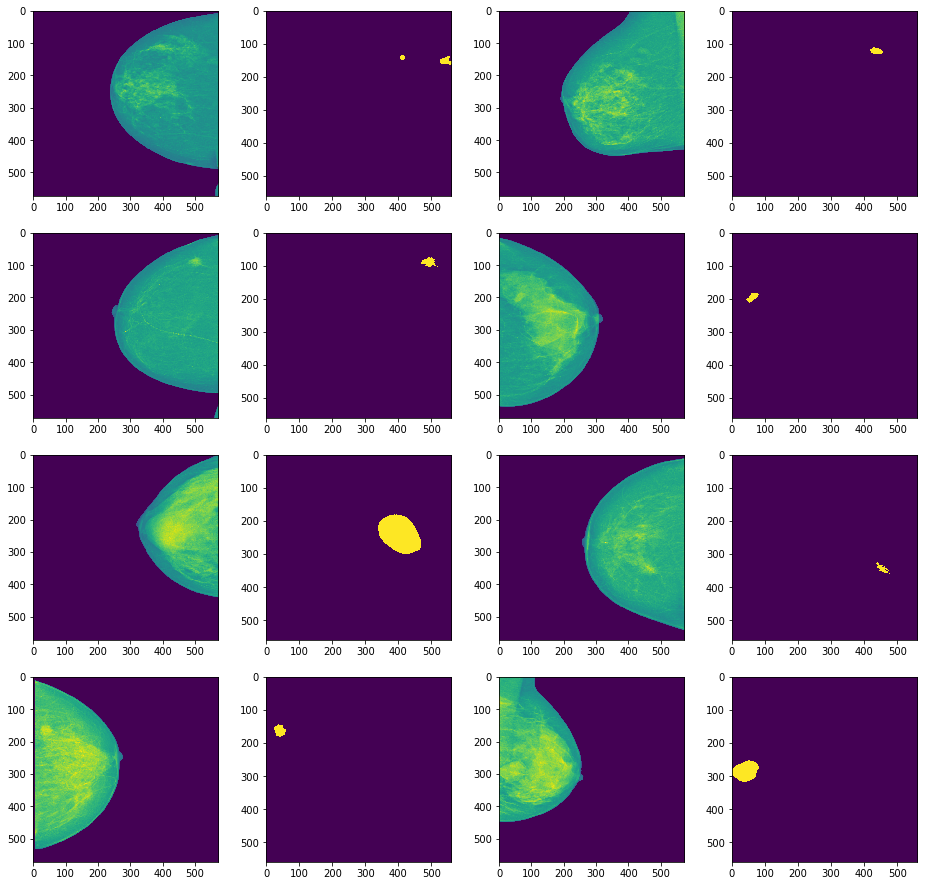

In [22]:
fig=plt.figure(figsize=(16, 32))
columns = 4
rows = 8
z =0
for i in range(1, int(columns*rows/2)+1):
    if i%2==0:
        imgp = y[i-2][0]
        fig.add_subplot(rows, columns, i)
        plt.imshow(imgp)
    else:
        imgp = X[i-1][0]
        fig.add_subplot(rows, columns, i)
        plt.imshow(imgp)
plt.show()

In [23]:
import pickle
import bz2

def save(name, to_save):
    sfile = bz2.BZ2File(name, 'w')
    pickle.dump(to_save, sfile)
    sfile.close()

def load(name):
    sfile = bz2.BZ2File(name, 'rb')
    data = pickle.load(sfile)
    sfile.close()
    return data

In [24]:
save("MassDicomX.bz2", X)
print("X done")
save("MassDicommask.bz2", y)
print("mask done")

X done
mask done
